/home/captain/Software/anaconda3/envs/HelloWorld39/lib/python3.9/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


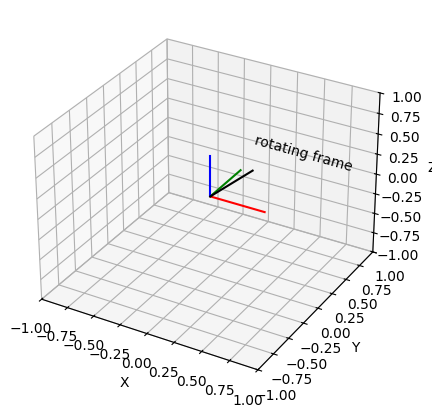

In [2]:
# pytransform3d.rotations.axis_angle_slerp

import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d  # noqa: F401

from pytransform3d import rotations as pr
from pytransform3d.plot_utils import Frame


def update_frame(step, n_frames, frame):
    angle = 2.0 * np.pi * (step + 1) / n_frames
    R = pr.passive_matrix_from_angle(0, angle)
    A2B = np.eye(4)
    A2B[:3, :3] = R
    frame.set_data(A2B)
    return frame


if __name__ == "__main__":
    n_frames = 50

    fig = plt.figure(figsize=(5, 5))

    ax = fig.add_subplot(111, projection="3d")
    ax.set_xlim((-1, 1))
    ax.set_ylim((-1, 1))
    ax.set_zlim((-1, 1))
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    frame = Frame(np.eye(4), label="rotating frame", s=0.5)
    frame.add_frame(ax)

    anim = animation.FuncAnimation(
        fig,
        update_frame,
        n_frames,
        fargs=(n_frames, frame),
        interval=50,
        blit=False,
    )

    plt.show()